In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer

import importlib
import utils
import networks

# change the default figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 16})

In [2]:
weights = [[0.5, 0.25, 0.25], [0.25, 0.5, 0.25], [0.25, 0.25, 0.5], [0.7, 0.15, 0.15], [0.15, 0.7, 0.15], [0.15, 0.15, 0.7], [1, 1, 1]]
n_epochs = 5000
key = 'MSE_Loss'

pinn_loss = pd.read_csv('test_final_performance/pinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()
ipinn_loss = pd.read_csv('test_final_performance/ipinn/average_loss.csv')['Average_MSE_Loss'].to_numpy()

# PINN Weights difference

Done


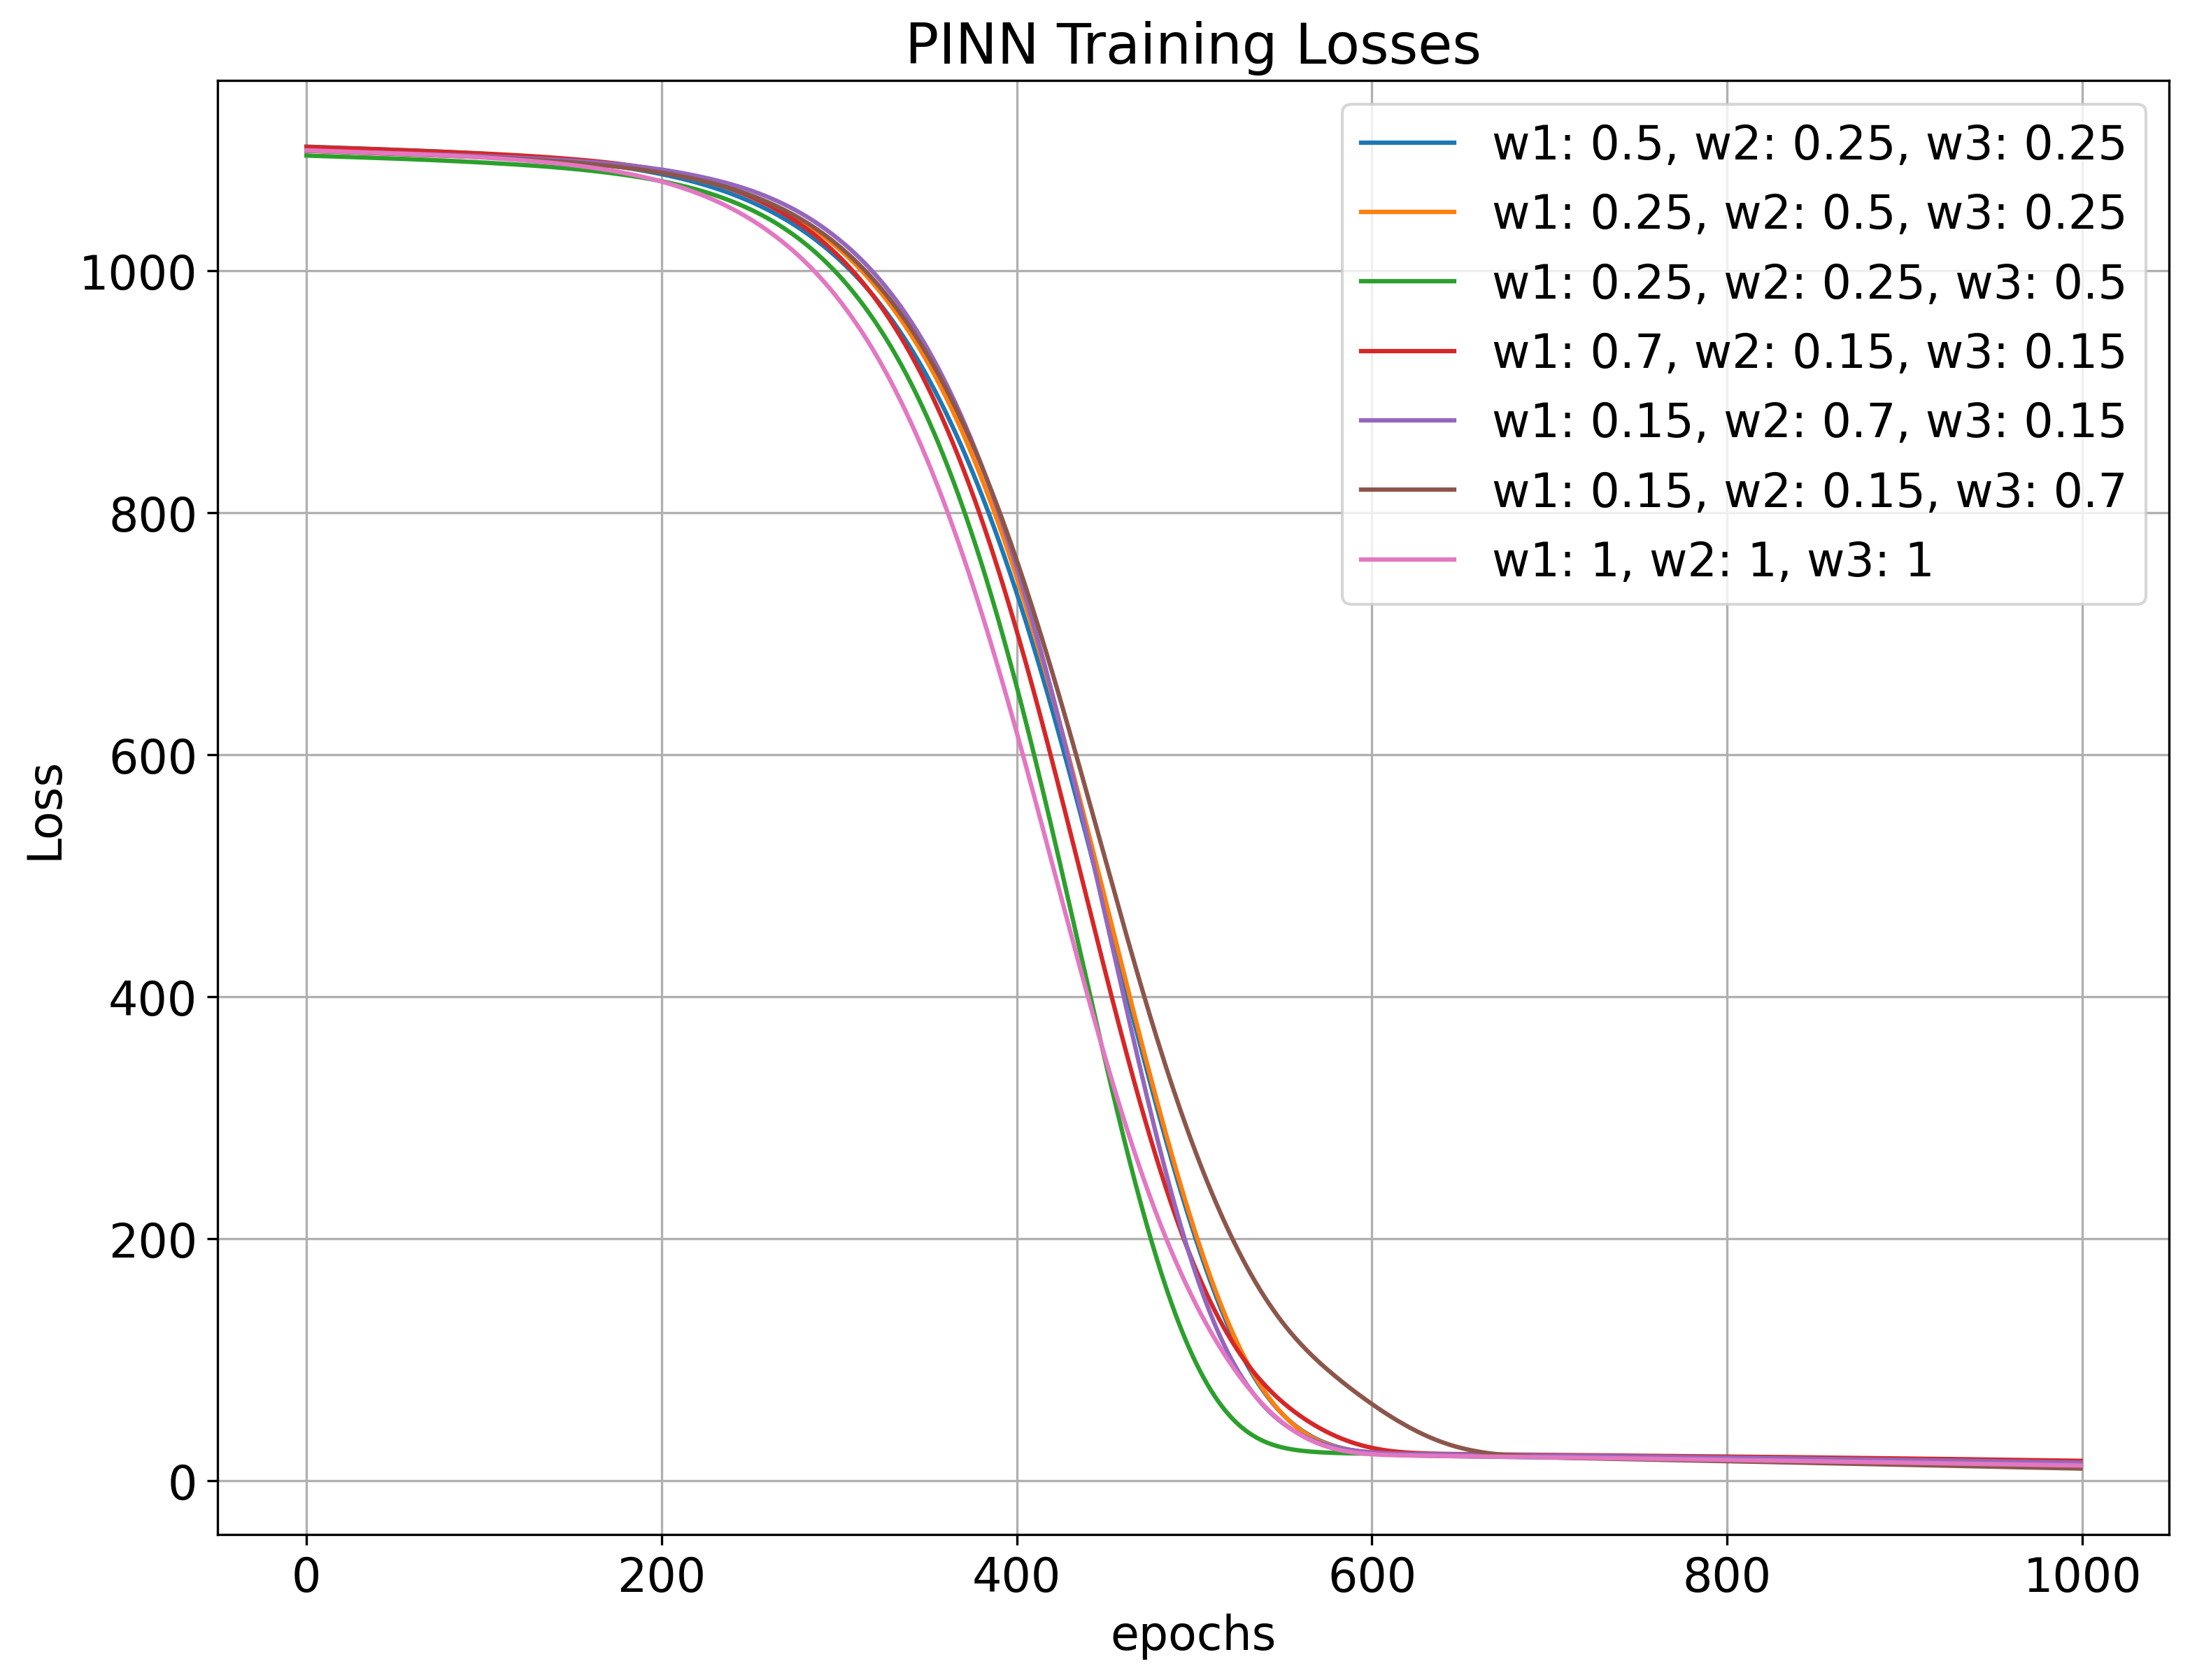

In [3]:
plot_hists = []

# extract data
for i in range(len(weights)):
    all_mse_loss_hist = []
    all_pde_loss_hist = []
    all_bc_loss_hist = []
    all_data_loss_hist = []
    for j in range(1, 8):
        all_mse_loss_hist.append(pd.read_csv(f'test_loss_weights/pinn/loss{j}/{weights[i][0]}-{weights[i][1]}-{weights[i][2]}.csv')['MSE_Loss'].to_numpy())
        all_pde_loss_hist.append(pd.read_csv(f'test_loss_weights/pinn/loss{j}/{weights[i][0]}-{weights[i][1]}-{weights[i][2]}.csv')['PDE_Loss'].to_numpy())
        all_bc_loss_hist.append(pd.read_csv(f'test_loss_weights/pinn/loss{j}/{weights[i][0]}-{weights[i][1]}-{weights[i][2]}.csv')['BC_Loss'].to_numpy())
        all_data_loss_hist.append(pd.read_csv(f'test_loss_weights/pinn/loss{j}/{weights[i][0]}-{weights[i][1]}-{weights[i][2]}.csv')['Data_Loss'].to_numpy())
    pass

    # Calculate the average losses among all 10 training sessions for each component
    average_mse_loss = pd.DataFrame(all_mse_loss_hist).mean(axis=0)
    average_pde_loss = pd.DataFrame(all_pde_loss_hist).mean(axis=0)
    average_bc_loss = pd.DataFrame(all_bc_loss_hist).mean(axis=0)
    average_data_loss = pd.DataFrame(all_data_loss_hist).mean(axis=0)
    
    average_loss_df = pd.DataFrame({
    'Average_MSE_Loss': average_mse_loss,
    'Average_PDE_Loss': average_pde_loss,
    'Average_BC_Loss': average_bc_loss,
    'Average_Data_Loss': average_data_loss
    })
    plot_hists.append(average_mse_loss)
print('Done')

fig = plt.figure(figsize=(12,9))
for i in range(len(weights)):
    plt.plot(range(1000), [item for item in plot_hists[i][:1000]], label=f'w1: {weights[i][0]}, w2: {weights[i][1]}, w3: {weights[i][2]}')
    pass
# plt.plot(range(2000), [item for item in pinn_loss[:2000]], label='PINN')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'PINN Training Losses')
plt.grid(True)
plt.savefig(f'test_loss_weights/plot/PINN Training {key}.png', bbox_inches='tight')

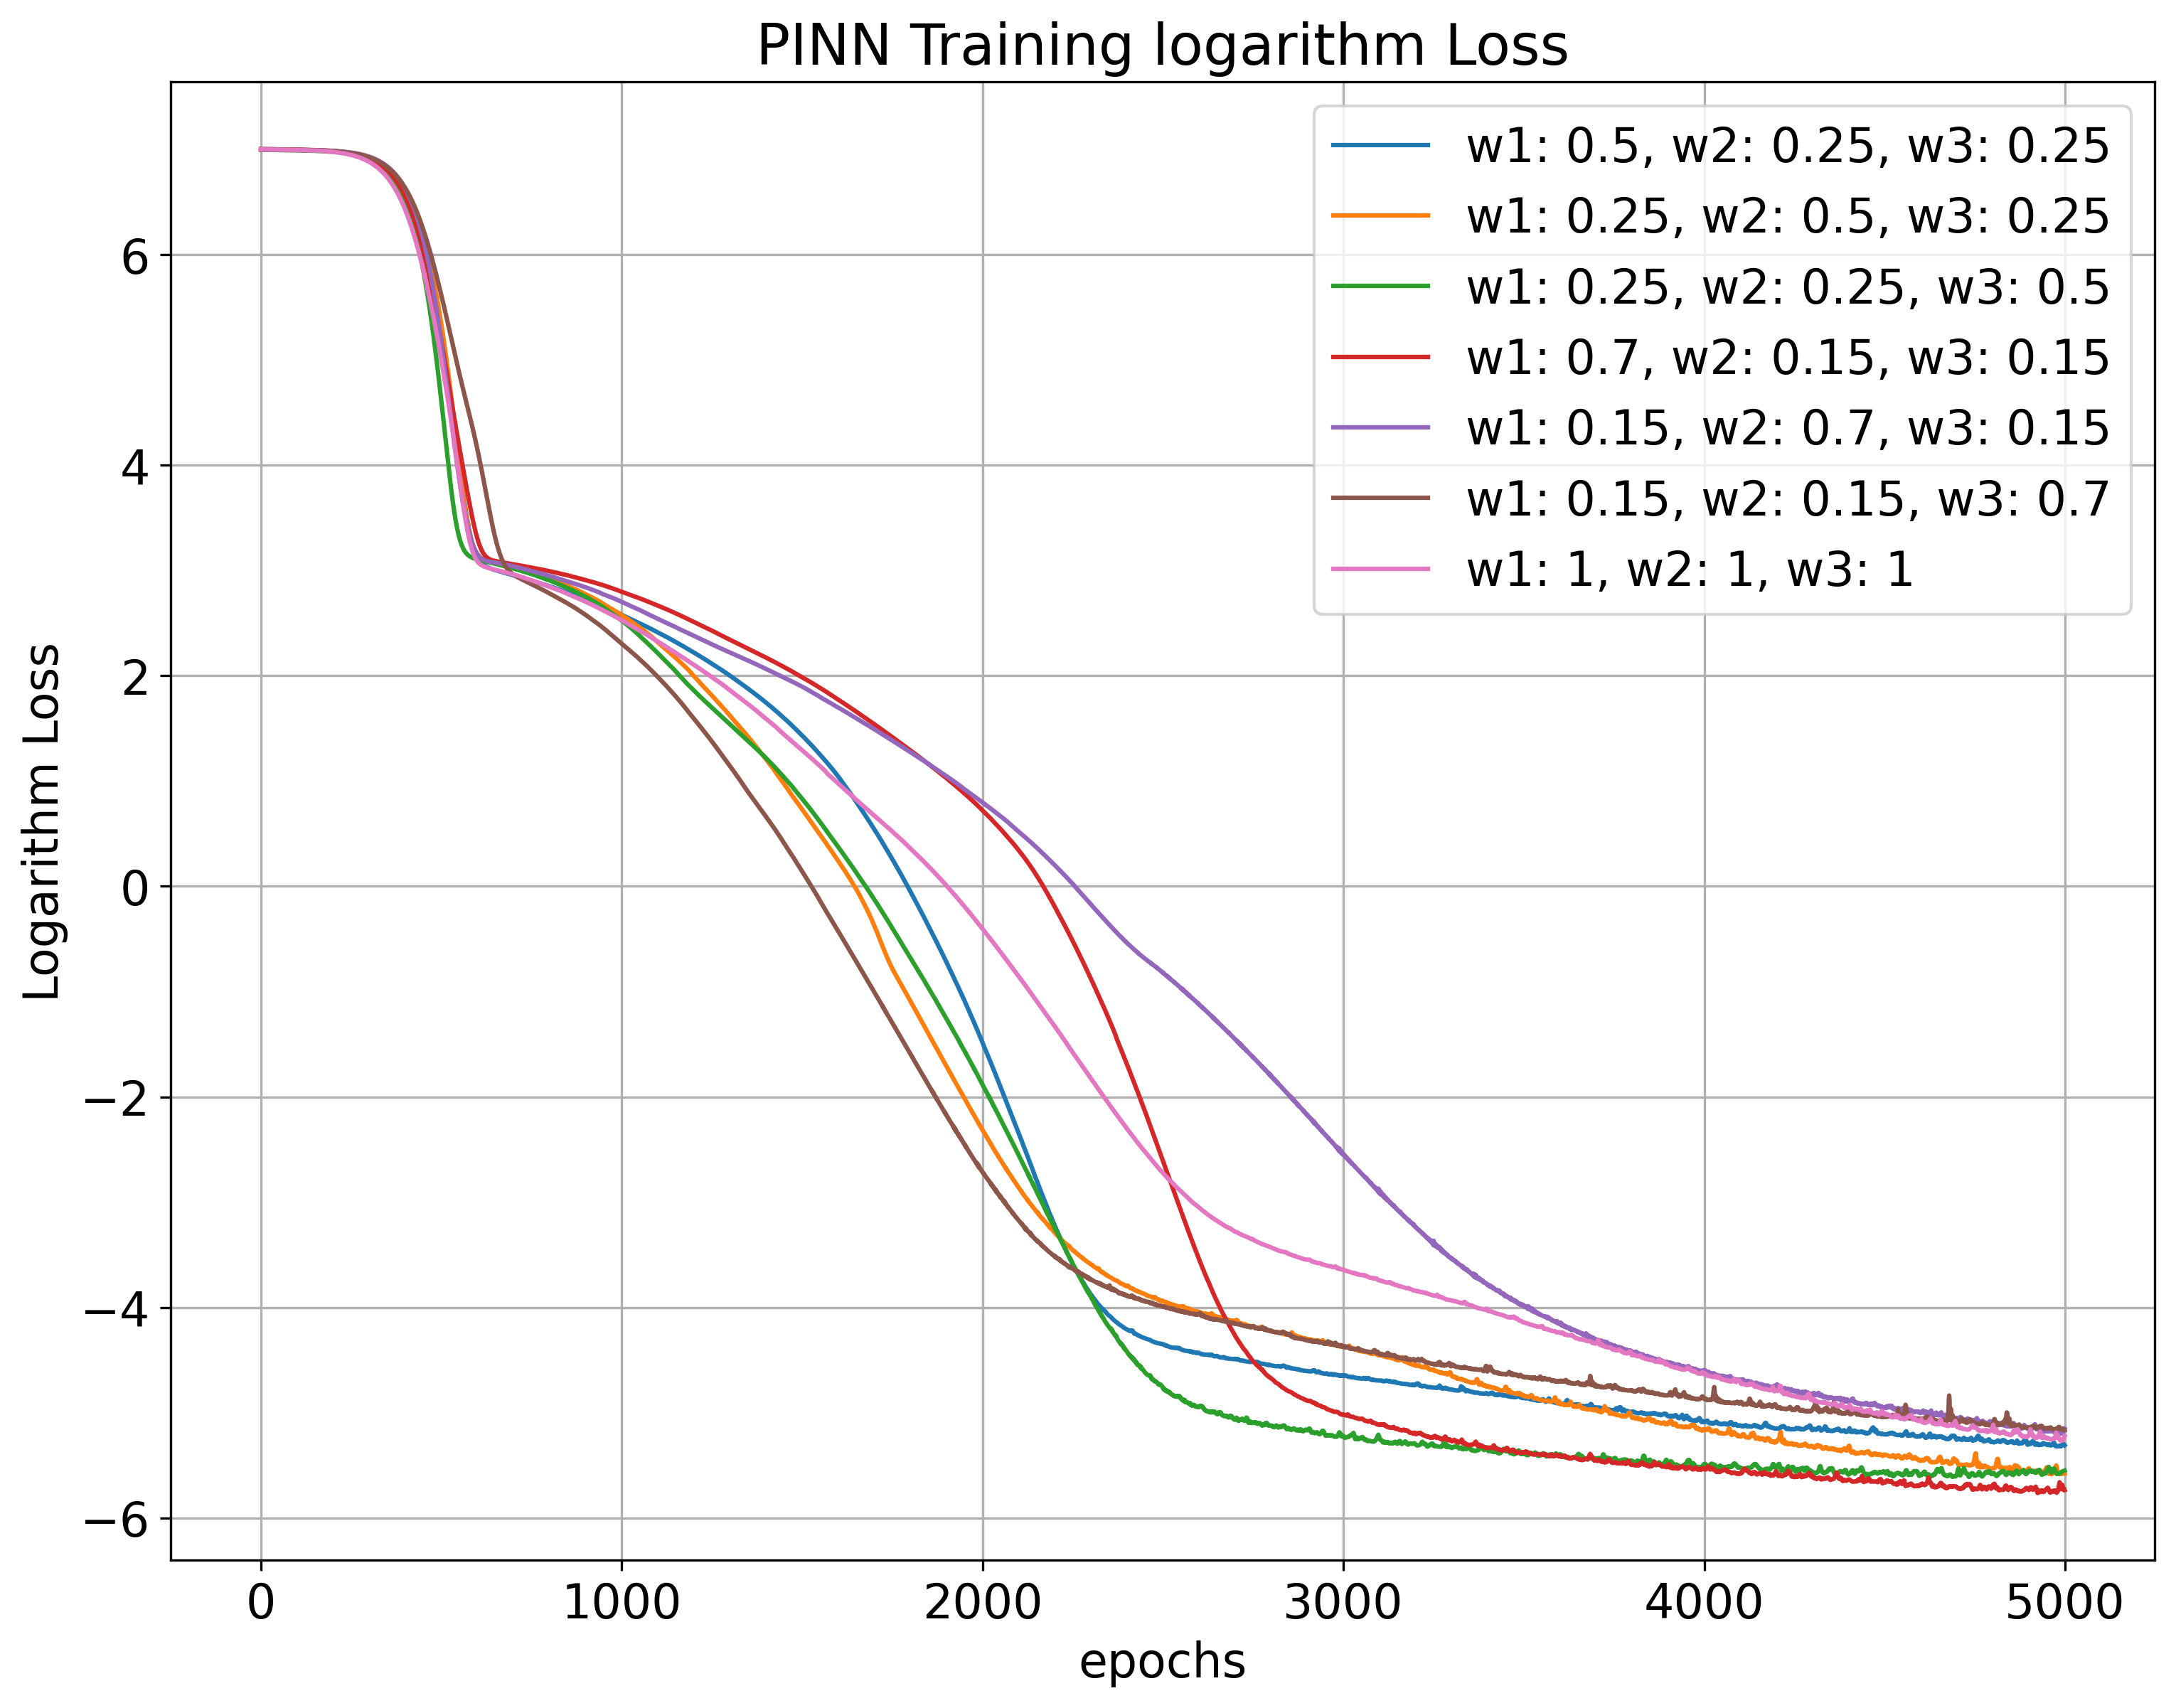

In [4]:
fig = plt.figure(figsize=(12,9))
for i in range(len(weights)):
    plt.plot(range(n_epochs), [np.log(item) for item in plot_hists[i]], label=f'w1: {weights[i][0]}, w2: {weights[i][1]}, w3: {weights[i][2]}')
    pass
# plt.plot(range(n_epochs), [np.log(item) for item in pinn_loss[:5000]], label='PINN')
plt.xlabel('epochs')
plt.ylabel('Logarithm Loss')
plt.legend()
plt.title(f'PINN Training logarithm Loss')
plt.grid(True)
plt.savefig(f'test_loss_weights/plot/PINN Training logarithm {key}.png', bbox_inches='tight')

# IPINN Weight Difference

In [5]:
plot_hists = []

# extract data
for i in range(len(weights)):
    all_mse_loss_hist = []
    all_pde_loss_hist = []
    all_bc_loss_hist = []
    all_data_loss_hist = []
    for j in range(1, 8):
        all_mse_loss_hist.append(pd.read_csv(f'test_loss_weights/ipinn/loss{j}/{weights[i][0]}-{weights[i][1]}-{weights[i][2]}.csv')['MSE_Loss'].to_numpy())
        all_pde_loss_hist.append(pd.read_csv(f'test_loss_weights/ipinn/loss{j}/{weights[i][0]}-{weights[i][1]}-{weights[i][2]}.csv')['PDE_Loss'].to_numpy())
        all_bc_loss_hist.append(pd.read_csv(f'test_loss_weights/ipinn/loss{j}/{weights[i][0]}-{weights[i][1]}-{weights[i][2]}.csv')['BC_Loss'].to_numpy())
        all_data_loss_hist.append(pd.read_csv(f'test_loss_weights/ipinn/loss{j}/{weights[i][0]}-{weights[i][1]}-{weights[i][2]}.csv')['Data_Loss'].to_numpy())
    pass

    # Calculate the average losses among all 10 training sessions for each component
    average_mse_loss = pd.DataFrame(all_mse_loss_hist).mean(axis=0)
    average_pde_loss = pd.DataFrame(all_pde_loss_hist).mean(axis=0)
    average_bc_loss = pd.DataFrame(all_bc_loss_hist).mean(axis=0)
    average_data_loss = pd.DataFrame(all_data_loss_hist).mean(axis=0)
    
    average_loss_df = pd.DataFrame({
    'Average_MSE_Loss': average_mse_loss,
    'Average_PDE_Loss': average_pde_loss,
    'Average_BC_Loss': average_bc_loss,
    'Average_Data_Loss': average_data_loss
    })
    plot_hists.append(average_mse_loss)
print('Done')
# print(all_mse_loss_hist)

Done


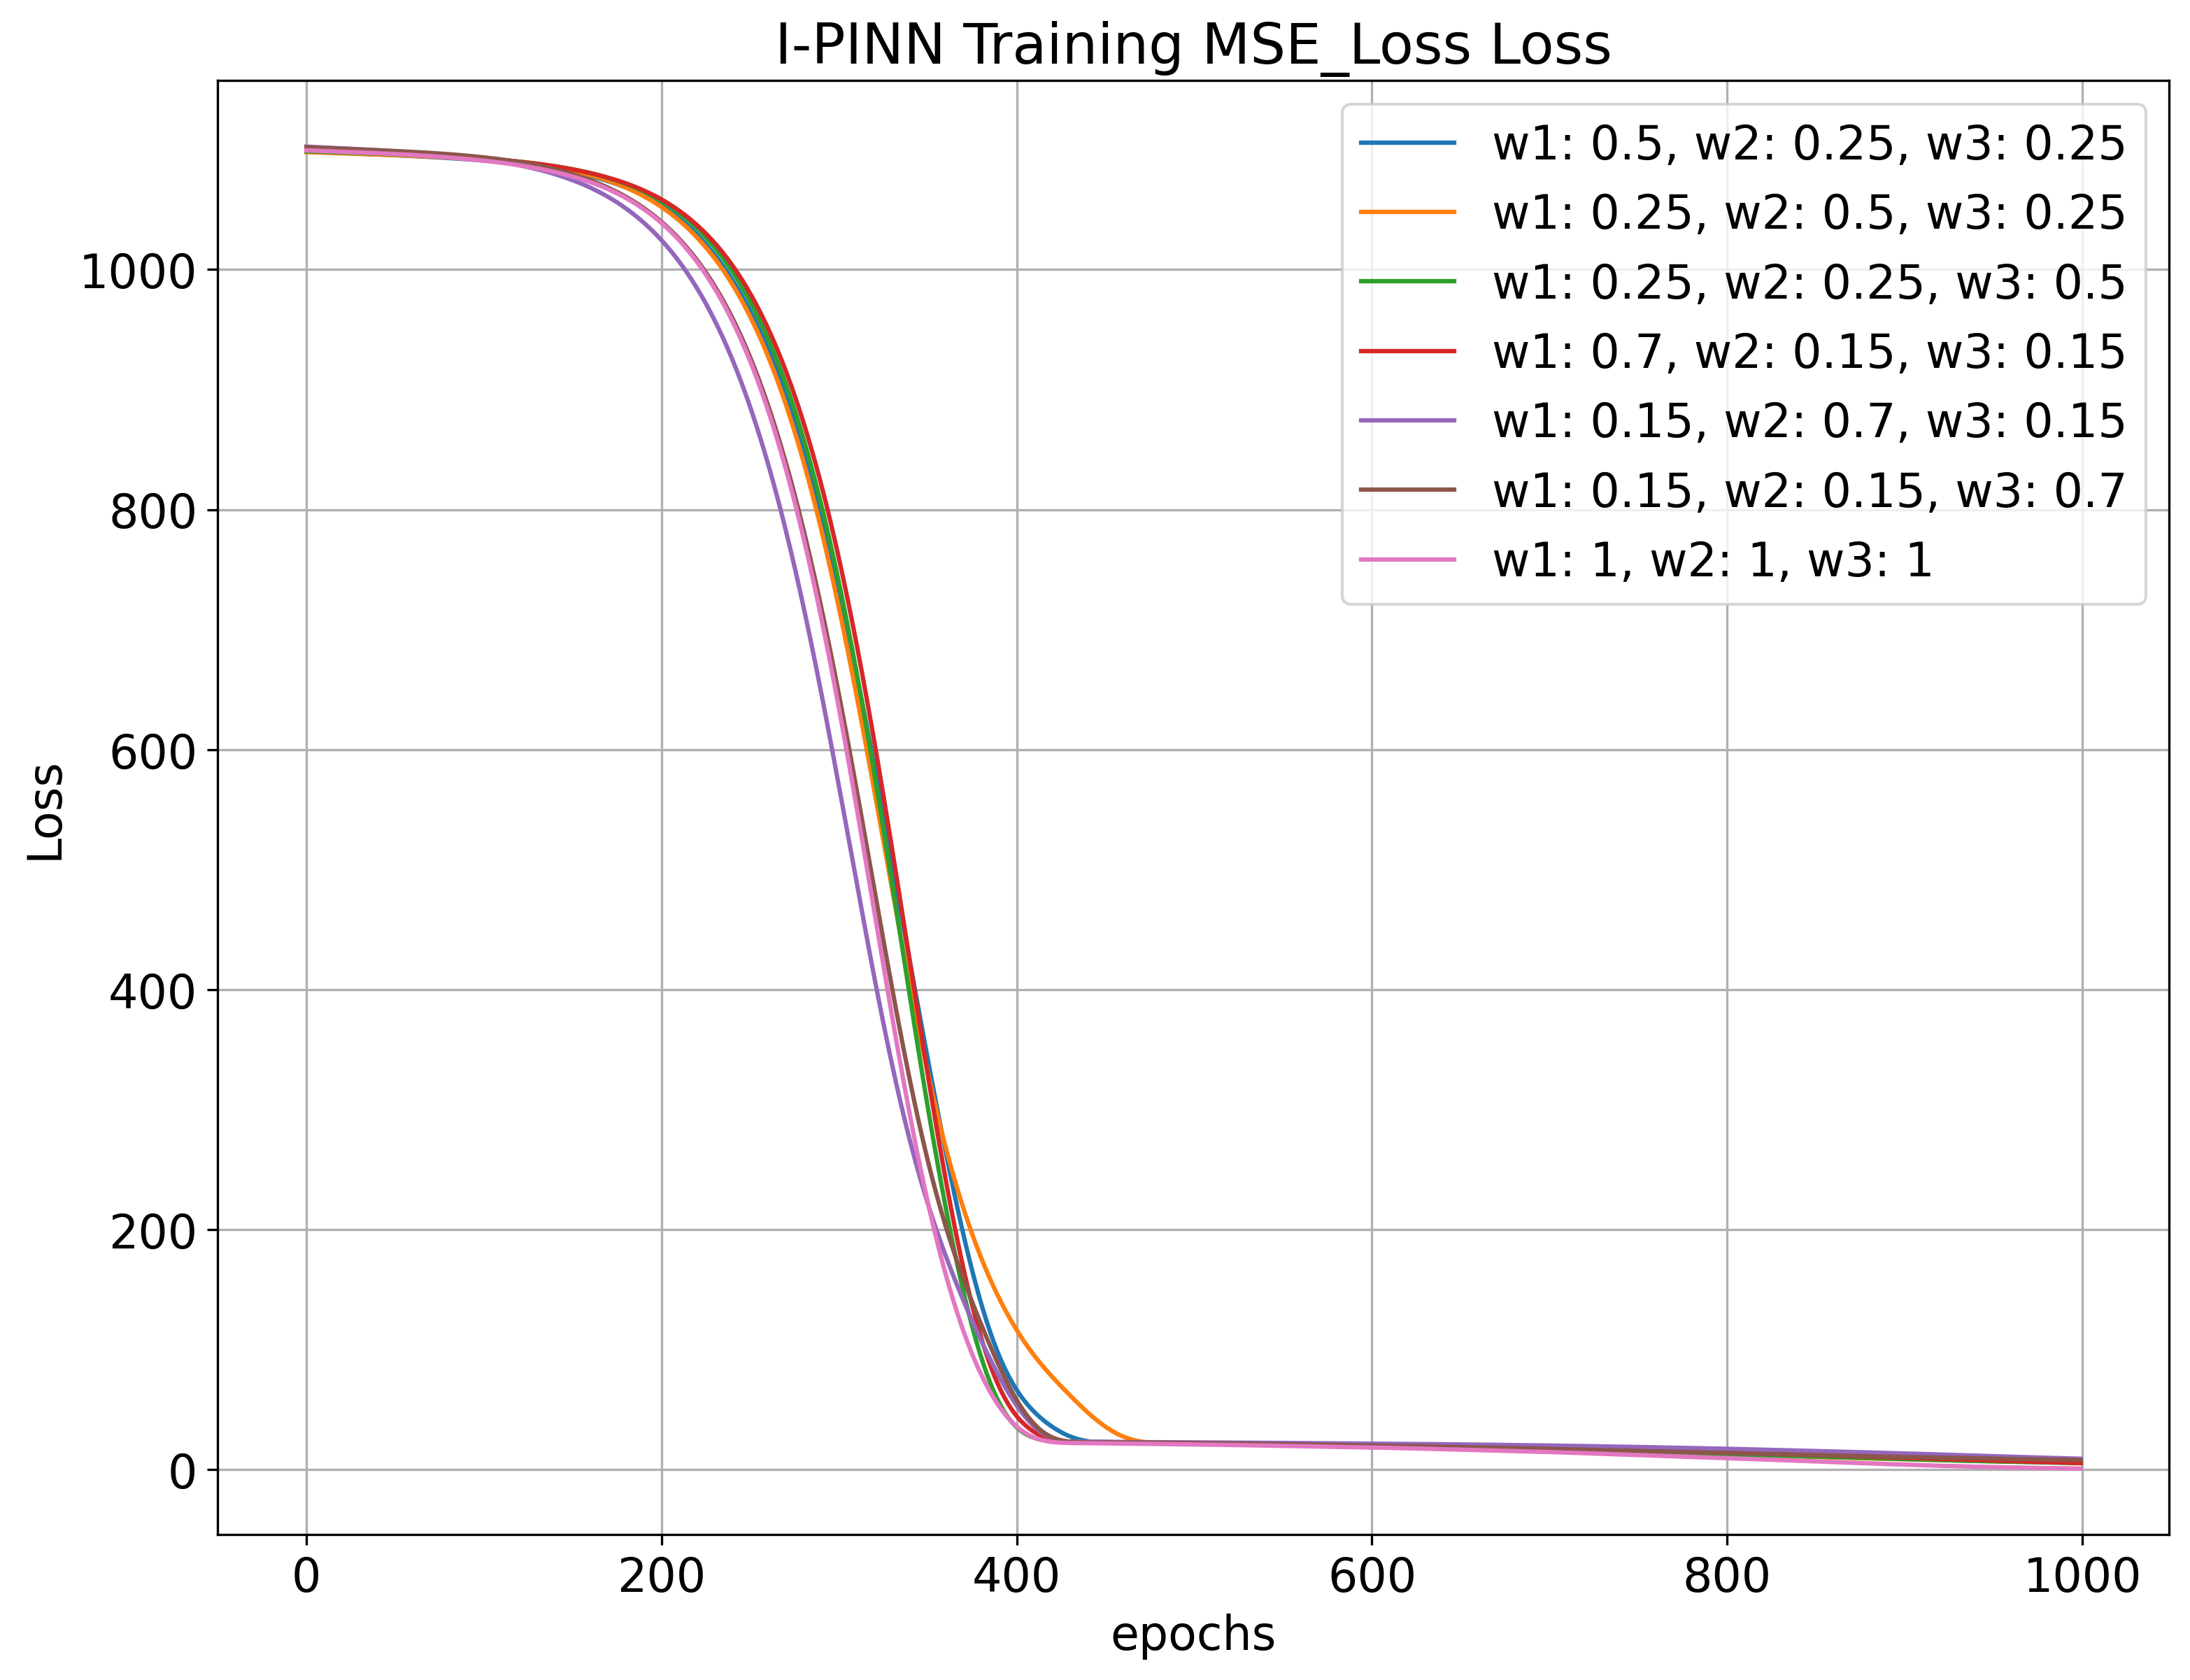

In [6]:
fig = plt.figure(figsize=(12,9))
for i in range(len(weights)):
    plt.plot(range(1000), [item for item in plot_hists[i][:1000]], label=f'w1: {weights[i][0]}, w2: {weights[i][1]}, w3: {weights[i][2]}')
    pass
# plt.plot(range(2000), [item for item in ipinn_loss[:2000]], label='I-PINN')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.title(f'I-PINN Training {key} Loss')
plt.grid(True)
plt.savefig(f'test_loss_weights/plot/I-PINN Training {key}.png', bbox_inches='tight')

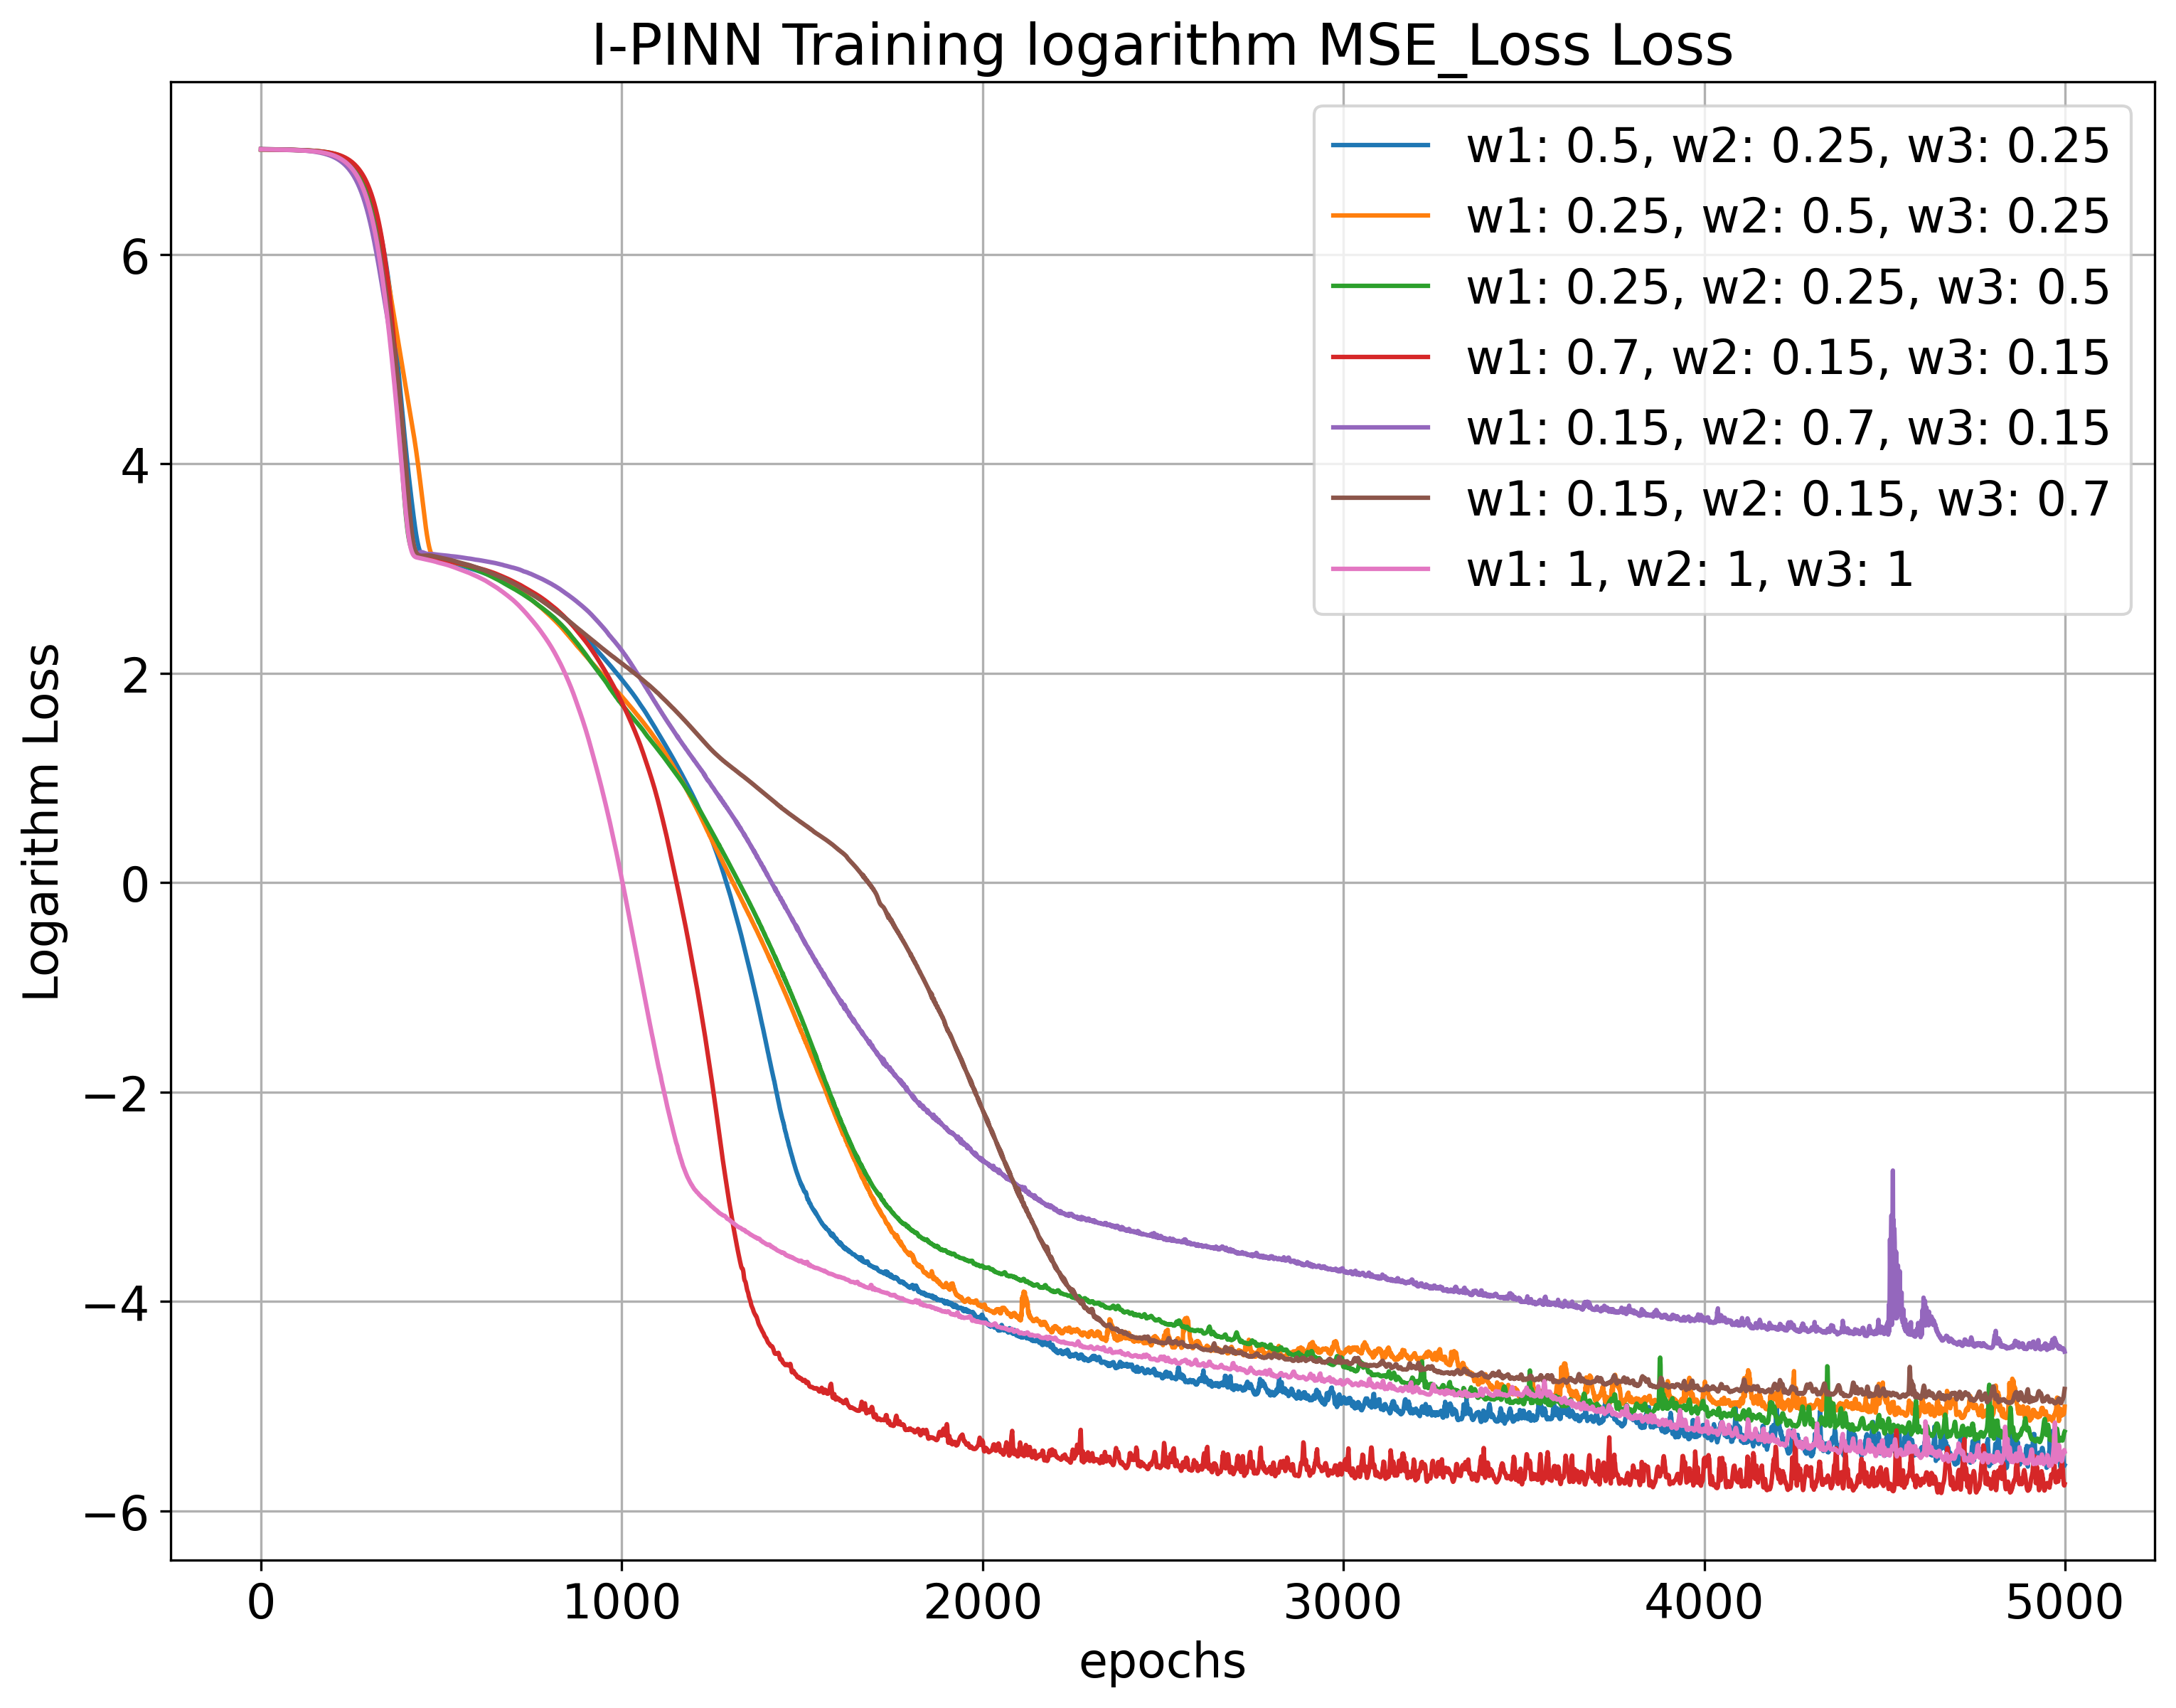

In [7]:
fig = plt.figure(figsize=(12,9))
for i in range(len(weights)):
    plt.plot(range(n_epochs), [np.log(item) for item in plot_hists[i]], label=f'w1: {weights[i][0]}, w2: {weights[i][1]}, w3: {weights[i][2]}')
    pass
# plt.plot(range(n_epochs), [np.log(item) for item in ipinn_loss[:5000]], label='I-PINN')
plt.xlabel('epochs')
plt.ylabel('Logarithm Loss')
plt.legend()
plt.title(f'I-PINN Training logarithm {key} Loss')
plt.grid(True)
plt.savefig(f'test_loss_weights/plot/I-PINN Training logarithm {key}.png', bbox_inches='tight')